### ロジスティック回帰

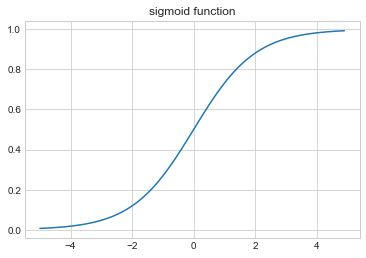

In [1]:
# シグモイド関数
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# スタイルの決定
matplotlib.style.use("seaborn-whitegrid")

# 描画範囲の指定は-5.0～5.0まで0.1刻み
x = np.arange(-5, 5, 0.1)
# ネイピア数
e = math.e
# シグモイド曲線
y = 1 / (1 + e**-x)

plt.title("sigmoid function")
plt.plot(x, y)
plt.show()


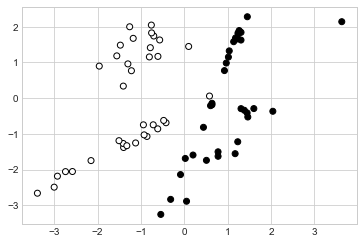

In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

# n_samples(生成するサンプル数)、n_features(生成する特徴量の数を表す)、n_redundant(余分な特徴量)
# XラベルとYラベルを作成
X, Y = make_classification(n_samples=70, n_features=2, n_redundant=0)

# データのプロット
plt.scatter(X[:, 0], X[:, 1], c=Y, marker='o', edgecolor="k")
plt.show()

In [14]:
# 説明変数（座標の組み合わせ）
X

array([[-0.5703951 ,  1.62866793],
       [-1.96407447,  0.89677984],
       [ 2.03974624, -0.36755151],
       [ 1.60151223, -0.29186307],
       [ 0.77590553, -1.50197575],
       [ 3.63013981,  2.14015429],
       [-1.40271348, -1.38175806],
       [ 0.92371109,  0.7715411 ],
       [-1.55949624,  1.18330272],
       [-1.41269704, -1.26827214],
       [-0.61555983, -0.85908983],
       [ 1.44647222, -0.4127506 ],
       [ 1.23639696,  1.82535935],
       [-2.92899998, -2.18387283],
       [-0.76262279,  2.04538554],
       [ 0.43930944, -0.81631514],
       [ 0.63625856, -0.18676947],
       [ 1.30584061, -0.29360584],
       [ 1.263658  ,  1.89241972],
       [-0.80843594,  1.15346393],
       [ 0.60239563, -0.21068276],
       [ 0.96569665,  0.98246997],
       [-0.78600031,  1.41276358],
       [-3.39067355, -2.66070926],
       [-1.2224051 ,  0.76732079],
       [-0.71938582, -0.74598422],
       [ 0.57856038,  0.05921139],
       [-1.12558279, -1.25439689],
       [ 0.19852544,

In [15]:
# 目的変数
Y

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0])

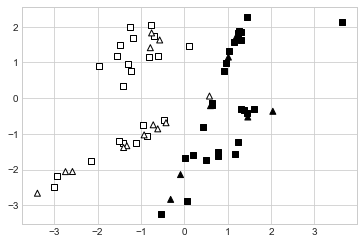

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# 30%を検証、70%を訓練用データに分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, marker='s', edgecolor="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, marker="^", edgecolor="k")
plt.show()

In [18]:
# ロジスティック回帰を行う
clf = LogisticRegression()
# ロジスティック回帰モデルで学習
clf.fit(X_train, Y_train)

print("coefficient =", clf.coef_)
print("intercept =", clf.intercept_)

coefficient = [[ 2.6096885  -0.67995611]]
intercept = [0.37067498]


In [19]:
# 分割する直線の係数を求める
w_0 = clf.intercept_[0]
w_1 = clf.coef_[0, 0]
w_2 = clf.coef_[0, 1]
print(w_0)
print(w_1)
print(w_2)

0.3706749756550154
2.6096884986413262
-0.6799561058592959


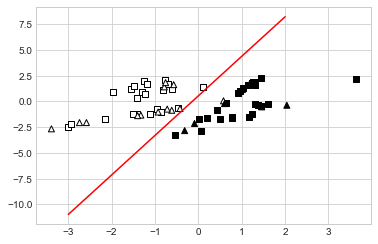

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, marker='s', edgecolor="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, marker="^", edgecolor="k")

x = np.linspace(-3, 2, 10)
plt.plot(x, (-w_1 * x - w_0) / w_2, color="red")
plt.show()

In [21]:
Y_pred = clf.predict(X_test)
Y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0])

In [22]:
Y_test

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [23]:
# 0のものは予測が正しかったもの
Y_pred - Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [24]:
# 混同行列
# TN（True Negative） 実際に0で正しくクラス0に分類されたデータ数
# FP（Faise Positive） 実際にはクラス0だが、誤ってクラス1に分類されたデータ数
# FN（False Negative） 実際にはクラス1だが、誤ってクラス0に分類されたデータ数
# TP（True Positive） 実際にクラス1で正しく1に分類されたデータ数

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[12,  1],
       [ 0,  8]], dtype=int64)

#### 0で正解だったものが１２個、1で正解だったものが８個、０で誤っていたものが０個、１で誤っていたものが１個

In [26]:
# 正解率
# 分類したデータの総数のうち正しく分類されたデータ数の割合

from sklearn.metrics import accuracy_score
accuracy_score(y_true=Y_test, y_pred=Y_pred)

0.9523809523809523

In [29]:
# 適合率
# クラス１に分類されたデータのうち、実際にクラス１であるデータ数の割合

from sklearn.metrics import precision_score
precision_score(y_true=Y_test, y_pred=Y_pred)

0.8888888888888888

In [30]:
# 再現率
# 実際にクラス1であるデータのうち、クラス1に分類されたデータ数の割合

from sklearn.metrics import recall_score
recall_score(y_true=Y_test, y_pred=Y_pred)

1.0

In [31]:
# F1スコア
# 適合率と再現率の調和平均

from sklearn.metrics import f1_score
f1_score(y_true=Y_test, y_pred=Y_pred)

0.9411764705882353

### 実際のデータを使ったロジスティック回帰（乳がんの判定）

In [33]:
import pandas as pd
# がんのデータを抽出
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df_X = pd.DataFrame(data=data.data, columns=data.feature_names)
df_Y = pd.DataFrame(data=data.target, columns=["判定(0:悪性 / 1:良性)"])
df_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
df_Y.head()

,判定(0:悪性 / 1:良性)
0,0
1,0
2,0
3,0
4,0


In [38]:
df_Y.tail()

,判定(0:悪性 / 1:良性)
564,0
565,0
566,0
567,0
568,1


In [44]:
# 学習用データと評価用データに分ける
X = df_X.values
Y = df_Y.values.ravel()

# データの分割７：３
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [45]:
# ロジスティック回帰を行う（どの位置で分類すればよいかtryするだけの数）
clf = LogisticRegression(max_iter=100000)
clf.fit(X_train, Y_train)

LogisticRegression(max_iter=100000)

In [46]:
# 評価
proba = clf.predict_proba(X_test)
df_prob = pd.DataFrame(data=proba, columns=["悪性の確率", "良性の確率"])
df_prob.head()

,悪性の確率,良性の確率
0,0.013163,0.986837
1,0.042187,0.957813
2,0.000442,0.999558
3,0.943062,0.056938
4,0.008777,0.991223


In [48]:
# 混同行列

Y_pred = clf.predict(X_test)
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[ 59,   6],
       [  2, 104]], dtype=int64)

In [49]:
# 正解率
print("正解率：{}".format(accuracy_score(y_true=Y_test, y_pred=Y_pred)))
# 適合率
print("適合率：{}".format(precision_score(y_true=Y_test, y_pred=Y_pred)))
# 再現率
print("再現率：{}".format(recall_score(y_true=Y_test, y_pred=Y_pred)))
# F1スコア
print("F1スコア：{}".format(f1_score(y_true=Y_test, y_pred=Y_pred)))

正解率：0.9532163742690059
適合率：0.9454545454545454
再現率：0.9811320754716981
F1スコア：0.9629629629629629


In [50]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

# 標準化したパラメータを取得
stdsc.fit(X)
# 訓練用データの標準化
X_train_std = stdsc.transform(X_train)
# 訓練用データを基準にテストデータも標準化
X_test_std = stdsc.transform(X_test)


In [51]:
X_test_std

array([[ 0.20809955, -0.54677898,  0.1203152 , ..., -0.53135074,
        -0.60789031, -0.86868823],
       [-0.19236047, -0.23029785, -0.22115156, ..., -0.5404867 ,
        -0.36036987, -0.99281966],
       [-0.92227695, -0.85395184, -0.8880209 , ..., -0.53211207,
        -0.51729459,  1.3329822 ],
       ...,
       [ 0.4353109 ,  0.90996504,  0.75093717, ...,  2.00372546,
         0.60868071,  0.99494572],
       [-0.61838176, -1.00753827, -0.60710374, ..., -1.01936319,
         0.36116028, -0.44586554],
       [-1.0472432 , -0.89118491, -1.04413176, ..., -1.06534751,
        -0.46229005, -0.06959214]])

In [52]:
X_test_std

array([[ 0.20809955, -0.54677898,  0.1203152 , ..., -0.53135074,
        -0.60789031, -0.86868823],
       [-0.19236047, -0.23029785, -0.22115156, ..., -0.5404867 ,
        -0.36036987, -0.99281966],
       [-0.92227695, -0.85395184, -0.8880209 , ..., -0.53211207,
        -0.51729459,  1.3329822 ],
       ...,
       [ 0.4353109 ,  0.90996504,  0.75093717, ...,  2.00372546,
         0.60868071,  0.99494572],
       [-0.61838176, -1.00753827, -0.60710374, ..., -1.01936319,
         0.36116028, -0.44586554],
       [-1.0472432 , -0.89118491, -1.04413176, ..., -1.06534751,
        -0.46229005, -0.06959214]])

In [54]:
clf = LogisticRegression(max_iter=100000)
clf.fit(X_train_std, Y_train)

LogisticRegression(max_iter=100000)

In [57]:
# 混同行列
Y_pred_std = clf.predict(X_test_std)
confusion_matrix(y_true=Y_test, y_pred=Y_pred_std)

array([[ 63,   2],
       [  0, 106]], dtype=int64)

In [58]:
# 正解率
print("正解率：{}".format(accuracy_score(y_true=Y_test, y_pred=Y_pred_std)))
# 適合率
print("適合率：{}".format(precision_score(y_true=Y_test, y_pred=Y_pred_std)))
# 再現率
print("再現率：{}".format(recall_score(y_true=Y_test, y_pred=Y_pred_std)))
# F1スコア
print("F1スコア：{}".format(f1_score(y_true=Y_test, y_pred=Y_pred_std)))

正解率：0.9883040935672515
適合率：0.9814814814814815
再現率：1.0
F1スコア：0.9906542056074767


#### 交差検証法
- 過学習を防ぎ、汎化性能を上げるために行う
- 学習用データと検証用データを2つに分割するのではなく、学習データセットの分割を繰り返し、モデル構築と評価を複数行う

In [60]:
# 交差検証法をロジスティック回帰で実装
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, Y, cv=5, scoring="accuracy")

array([0.93859649, 0.94736842, 0.98245614, 0.92982456, 0.95575221])

### データに偏りがなく、分析できていることが分かる